# Closed Deals Analysis

In [10]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
import matplotlib.pyplot as plt


In [11]:
mql=pd.read_csv('olist_marketing_qualified_leads_dataset.csv')
closed_deals=pd.read_csv('olist_closed_deals_dataset.csv')
sellers=pd.read_csv('olist_sellers_dataset.csv')

In [12]:
#merge closed_deals with seller
closed_deals=closed_deals.merge(sellers, on='seller_id').merge(mql, on='mql_id')
closed_deals.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,seller_zip_code_prefix,seller_city,seller_state,first_contact_date,landing_page_id,origin
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,30421,belo horizonte,MG,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
1,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,93542,novo hamburgo,RS,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search
2,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0,11015,santos,SP,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown
3,b94fba7670eeb44dce2a0d8eb790e9f5,1c742ac33582852aaf3bcfbf5893abcf,fdb16d3cbbeb5798f2f66c4096be026d,495d4e95a8cf8bbf8b432b612a2aa328,2018-02-07 18:04:05,health_beauty,online_medium,NaN,NaN,NaN,NaN,manufacturer,NaN,0.0,30668,belo horizonte,MG,2018-02-06,40dec9f3d5259a3d2dbcdab2114fae47,organic_search
4,b02c89251106e1fdd9d92744be9f94f2,44ed138eca6214d572ce1d813fb0049b,34d40cdaf94010a1d05b0d6212f9e909,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-17 17:01:57,health_beauty,offline,cat,NaN,NaN,NaN,manufacturer,NaN,0.0,92010,canoas,RS,2018-04-13,b76ef37428e6799c421989521c0e5077,unknown


In [13]:
    closed_deals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 379
Data columns (total 20 columns):
mql_id                           380 non-null object
seller_id                        380 non-null object
sdr_id                           380 non-null object
sr_id                            380 non-null object
won_date                         380 non-null object
business_segment                 380 non-null object
lead_type                        377 non-null object
lead_behaviour_profile           289 non-null object
has_company                      5 non-null object
has_gtin                         5 non-null object
average_stock                    5 non-null object
business_type                    377 non-null object
declared_product_catalog_size    0 non-null float64
declared_monthly_revenue         380 non-null float64
seller_zip_code_prefix           380 non-null int64
seller_city                      380 non-null object
seller_state                     380 non-null object
f

In [14]:
#drop columns
closed_deals.drop(['declared_product_catalog_size','average_stock','has_gtin','has_company'],axis=1,inplace=True)
closed_deals.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,seller_zip_code_prefix,seller_city,seller_state,first_contact_date,landing_page_id,origin
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0,30421,belo horizonte,MG,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
1,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,reseller,0.0,93542,novo hamburgo,RS,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search
2,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,manufacturer,0.0,11015,santos,SP,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown
3,b94fba7670eeb44dce2a0d8eb790e9f5,1c742ac33582852aaf3bcfbf5893abcf,fdb16d3cbbeb5798f2f66c4096be026d,495d4e95a8cf8bbf8b432b612a2aa328,2018-02-07 18:04:05,health_beauty,online_medium,NaN,manufacturer,0.0,30668,belo horizonte,MG,2018-02-06,40dec9f3d5259a3d2dbcdab2114fae47,organic_search
4,b02c89251106e1fdd9d92744be9f94f2,44ed138eca6214d572ce1d813fb0049b,34d40cdaf94010a1d05b0d6212f9e909,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-17 17:01:57,health_beauty,offline,cat,manufacturer,0.0,92010,canoas,RS,2018-04-13,b76ef37428e6799c421989521c0e5077,unknown


In [15]:
closed_deals.apply(lambda x: sum(x.isnull()), axis = 0)

mql_id                       0
seller_id                    0
sdr_id                       0
sr_id                        0
won_date                     0
business_segment             0
lead_type                    3
lead_behaviour_profile      91
business_type                3
declared_monthly_revenue     0
seller_zip_code_prefix       0
seller_city                  0
seller_state                 0
first_contact_date           0
landing_page_id              0
origin                       4
dtype: int64

In [16]:
#replace values
closed_deals.fillna('unknown',inplace=True)
closed_deals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 379
Data columns (total 16 columns):
mql_id                      380 non-null object
seller_id                   380 non-null object
sdr_id                      380 non-null object
sr_id                       380 non-null object
won_date                    380 non-null object
business_segment            380 non-null object
lead_type                   380 non-null object
lead_behaviour_profile      380 non-null object
business_type               380 non-null object
declared_monthly_revenue    380 non-null float64
seller_zip_code_prefix      380 non-null int64
seller_city                 380 non-null object
seller_state                380 non-null object
first_contact_date          380 non-null object
landing_page_id             380 non-null object
origin                      380 non-null object
dtypes: float64(1), int64(1), object(14)
memory usage: 50.5+ KB


In [17]:
closed_deals.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,seller_zip_code_prefix,seller_city,seller_state,first_contact_date,landing_page_id,origin
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0,30421,belo horizonte,MG,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
1,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,reseller,0.0,93542,novo hamburgo,RS,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search
2,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,manufacturer,0.0,11015,santos,SP,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown
3,b94fba7670eeb44dce2a0d8eb790e9f5,1c742ac33582852aaf3bcfbf5893abcf,fdb16d3cbbeb5798f2f66c4096be026d,495d4e95a8cf8bbf8b432b612a2aa328,2018-02-07 18:04:05,health_beauty,online_medium,unknown,manufacturer,0.0,30668,belo horizonte,MG,2018-02-06,40dec9f3d5259a3d2dbcdab2114fae47,organic_search
4,b02c89251106e1fdd9d92744be9f94f2,44ed138eca6214d572ce1d813fb0049b,34d40cdaf94010a1d05b0d6212f9e909,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-17 17:01:57,health_beauty,offline,cat,manufacturer,0.0,92010,canoas,RS,2018-04-13,b76ef37428e6799c421989521c0e5077,unknown


In [18]:
print(closed_deals.shape)

(380, 16)


In [19]:
closed_deals = closed_deals.drop_duplicates(keep='first')

In [20]:
print(closed_deals.shape)

(380, 16)


## Conversion Plots 

Text(0.5,0.98,'Where are conversions coming from?')

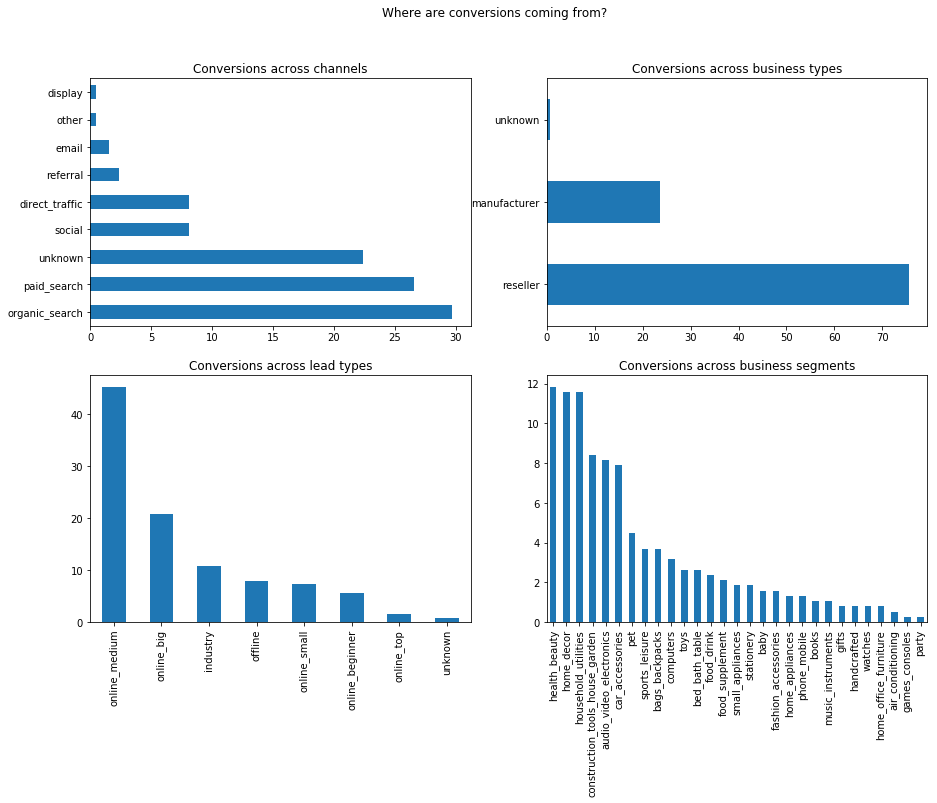

In [21]:
fig = plt.figure(figsize=(15,10))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

(closed_deals['origin'].value_counts(normalize=True)*100).plot(kind='barh', title='Conversions across channels', ax=ax1)
(closed_deals['business_type'].value_counts(normalize=True)*100).plot(kind='barh', title='Conversions across business types', ax=ax2)
(closed_deals['lead_type'].value_counts(normalize=True)*100).plot(kind='bar', title='Conversions across lead types', ax=ax3)
(closed_deals['business_segment'].value_counts(normalize=True)*100).plot(kind='bar', title='Conversions across business segments', ax=ax4)

plt.suptitle('Where are conversions coming from?')

In [22]:
mql=pd.read_csv('olist_marketing_qualified_leads_dataset.csv')
closed_deals=pd.read_csv('olist_closed_deals_dataset.csv')


In [23]:
funnel = mql.merge(closed_deals, on='mql_id', how='left')
#check results
funnel.head()

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0


# Conversion Rate Analysis

In [24]:
#creating variable 'converted' to establish which leads converted
funnel['leads_converted']=funnel['seller_id'].apply(lambda x: 'No' if pd.isnull(x) else 'Yes')
#check results
funnel.head()

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,leads_converted
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,Yes


In [25]:

#selecting columns
funnel=funnel[['mql_id','first_contact_date','landing_page_id','origin','leads_converted']]
#check results
funnel.head()

,mql_id,first_contact_date,landing_page_id,origin,leads_converted
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,No
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,No
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,No
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,No
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,Yes


In [26]:
funnel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 5 columns):
mql_id                8000 non-null object
first_contact_date    8000 non-null object
landing_page_id       8000 non-null object
origin                7940 non-null object
leads_converted       8000 non-null object
dtypes: object(5)
memory usage: 375.0+ KB


In [27]:
 #first_contact_date is an object and not datetime, so converting it
funnel['first_contact_date']=pd.to_datetime(funnel['first_contact_date'])
funnel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 5 columns):
mql_id                8000 non-null object
first_contact_date    8000 non-null datetime64[ns]
landing_page_id       8000 non-null object
origin                7940 non-null object
leads_converted       8000 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 375.0+ KB


In [28]:
funnel['origin'].fillna('unknown', inplace=True)
#check results
funnel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 5 columns):
mql_id                8000 non-null object
first_contact_date    8000 non-null datetime64[ns]
landing_page_id       8000 non-null object
origin                8000 non-null object
leads_converted       8000 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 375.0+ KB


In [29]:
funnel.sort_values('first_contact_date', ascending=True, inplace=True)
funnel.head()

,mql_id,first_contact_date,landing_page_id,origin,leads_converted
1973,0b99dab71519032b917dc641cdd7ac5b,2017-06-14,d41d8cd98f00b204e9800998ecf8427e,unknown,No
5232,6dd0ef38856fd5fb21aed5223aea9e66,2017-06-14,8f08d2ef8b9aec2ec5118fbcf7f96f11,display,No
5358,70bd89abdbdba90e471cd3d0bbdbac49,2017-06-16,8f08d2ef8b9aec2ec5118fbcf7f96f11,unknown,No
2676,98c9832865e4ab224a1649e8e6e9a2a0,2017-06-20,b6cd08ac77c501fd6857f7916d2c24f3,email,No
2976,e1e32379b464961f67fba6ddf6d4b3b7,2017-07-02,0b37d43dbde6452cdd94c17bf61a88e4,direct_traffic,No


In [30]:
funnel['leads_converted'].value_counts(normalize=True)*100

No     89.475
Yes    10.525
Name: leads_converted, dtype: float64

In [31]:
funnel['leads_converted'].value_counts()*100

No     715800
Yes     84200
Name: leads_converted, dtype: int64

In [32]:
# seting index for resampling
funnel_ts=funnel.set_index('first_contact_date')

In [33]:
#get montlhy conversion rate
monthly_conv_rate=(funnel_ts.resample('M')['leads_converted'].value_counts(normalize=True).unstack().fillna(0))*100

In [34]:
monthly_conv_rate

leads_converted,No,Yes
first_contact_date,,
2017-06-30,100.000000,0.000000
2017-07-31,99.163180,0.836820
2017-08-31,97.668394,2.331606
2017-09-30,97.756410,2.243590
2017-10-31,96.634615,3.365385
2017-11-30,95.955056,4.044944
2017-12-31,94.500000,5.500000
2018-01-31,86.678352,13.321648
2018-02-28,85.505837,14.494163


In [35]:
monthly_conv_rate.Yes.describe()

count    12.000000
mean      6.989626
std       5.684855
min       0.000000
25%       2.309602
50%       4.772472
75%      13.375111
max      14.494163
Name: Yes, dtype: float64

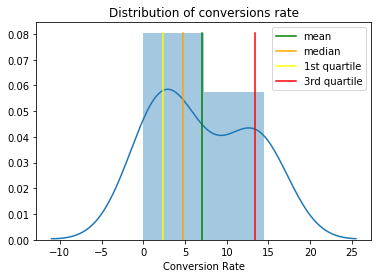

In [37]:
sns.distplot(monthly_conv_rate.Yes, axlabel= 'Conversion Rate')
data = monthly_conv_rate.Yes
plt.axvline(data.mean(), c='green', ymax=0.95)
plt.axvline(data.median(), c='orange', ymax=0.95)
plt.axvline(data.describe()[4], c='yellow', ymax=0.95)
plt.axvline(data.describe()[6], c='red', ymax=0.95)
plt.title('Distribution of conversions rate')
plt.legend(labels=['mean', 'median', '1st quartile', '3rd quartile'])
 

# Brazilian Dataset Analysis

In [38]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
import datetime as dt
import calendar

In [39]:
olist_order_items_dataset = pd.read_csv('olist_order_items_dataset.csv')
olist_order_payments_dataset = pd.read_csv('olist_order_payments_dataset.csv')
olist_orders_dataset = pd.read_csv('olist_orders_dataset.csv')
olist_products_dataset = pd.read_csv('olist_products_dataset.csv')
product_category_name_translation = pd.read_csv('product_category_name_translation.csv')
olist_sellers_dataset =  pd.read_csv('olist_sellers_dataset.csv')
olist_customers_dataset =  pd.read_csv('olist_customers_dataset.csv')
olist_geolocation_dataset = pd.read_csv('olist_geolocation_dataset.csv')



In [40]:
order = pd.merge(olist_order_items_dataset,olist_order_payments_dataset,how="left",on=['order_id','order_id']).merge(olist_orders_dataset,how="left",on=['order_id']).merge(olist_products_dataset
,how="left",on=['product_id']).merge(product_category_name_translation,how="left",on=['product_category_name']).merge(olist_sellers_dataset
,how="left",on=['seller_id'])

In [41]:
order.head(15)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,87900,loanda,PR
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,1.0,boleto,1.0,...,558.0,1.0,450.0,24.0,8.0,15.0,housewares,14091,ribeirao preto,SP
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,1.0,credit_card,1.0,...,815.0,1.0,200.0,27.0,5.0,20.0,telephony,1026,sao paulo,SP
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,1.0,credit_card,10.0,...,1310.0,3.0,13805.0,35.0,75.0,45.0,garden_tools,19010,presidente prudente,SP
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,1.0,credit_card,3.0,...,493.0,1.0,2000.0,30.0,12.0,16.0,health_beauty,3702,sao paulo,SP
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,1.0,credit_card,1.0,...,1192.0,1.0,850.0,29.0,3.0,21.0,books_technical,2274,sao paulo,SP


In [42]:
order.to_csv ('C:/Users/Tanushree/Desktop/alldata/order.csv', index = False, header=True)


In [43]:
order[['order_id','order_item_id']]

,order_id,order_item_id
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
5,00048cc3ae777c65dbb7d2a0634bc1ea,1
6,00054e8431b9d7675808bcb819fb4a32,1
7,000576fe39319847cbb9d288c5617fa6,1
8,0005a1a1728c9d785b8e2b08b904576c,1
9,0005f50442cb953dcd1d21e1fb923495,1
